# Random Forest Regression with Python

Random forest is simply the making of dozens if not thousands of decision trees. The decision each tree makes about an example are then tallied for the purpose of voting with the classification that receives the most votes winning. For regression, the results of the trees are averaged in  order to give the most accurate results

In this post, we will use the cancer dataset from the pydataset module to predict the age of people. Below is some initial code.

In [9]:
import pandas as pd
import numpy as np
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Data Prep

We can load our dataset as df, drop all NAs, and create our dataset that contains the independent variables and a separate dataset that includes the dependent variable of age. The code is below

In [10]:
df = data('cancer')
df

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
224,1.0,188,1,77,1,1.0,80.0,60.0,NaN,3.0
225,13.0,191,1,39,1,0.0,90.0,90.0,2350.0,-5.0
226,32.0,105,1,75,2,2.0,60.0,70.0,1025.0,5.0
227,6.0,174,1,66,1,1.0,90.0,100.0,1075.0,1.0


You can see we have some NA. We will drop these

In [11]:
df=df.dropna()

In [12]:
df

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
6,12.0,1022,1,74,1,1.0,50.0,80.0,513.0,0.0
7,7.0,310,2,68,2,2.0,70.0,60.0,384.0,10.0
8,11.0,361,2,71,2,2.0,60.0,80.0,538.0,1.0
9,1.0,218,2,53,1,1.0,70.0,80.0,825.0,16.0
10,7.0,166,2,61,1,2.0,70.0,70.0,271.0,34.0
11,6.0,170,2,57,1,1.0,80.0,80.0,1025.0,27.0
15,12.0,567,2,57,1,1.0,80.0,70.0,2600.0,60.0
17,22.0,613,2,70,1,1.0,90.0,100.0,1150.0,-5.0


This looks better. Lets now separate are independent and dependent variables

In [ ]:
X=df[['time','status',"sex","ph.ecog",'ph.karno','pat.karno','meal.cal','wt.loss']]
y=df['age']

## Model Development & Testing

Next, we need to set up our train and test sets using a 70/30 split. After that, we set up our model using the RandomForestRegressor function. n_estimators is the number of trees we want to create and the random_state argument is for supporting reproducibility. The code is below

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
h=RandomForestRegressor(n_estimators=100,random_state=1)

We can now run our model and test it. Running the model requires the .fit() function and testing involves the .predict() function. The results of the test are found using the mean_squared_error() function.

In [14]:
h.fit(x_train,y_train)
y_pred=h.predict(x_test)
mean_squared_error(y_test,y_pred)

71.75780196078432

The MSE of 71.75 is only useful for model comparison and has little meaning by its self. Another way to assess the model is by determining variable importance. This helps you to determine in a descriptive way the strongest variables for the regression model. The code is below followed by the plot of the variables.

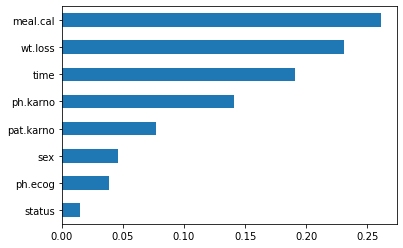

In [15]:
model_ranks=pd.Series(h.feature_importances_,index=x_train.columns,name="Importance").sort_values(ascending=True,inplace=False) 
ax=model_ranks.plot(kind='barh')

As you can see, the strongest predictors of age include calories per meal, weight loss, and time sick. Sex and whether the person is censored or dead make a smaller difference. This makes sense as younger people eat more and probably lose more weight because they are heavier initially when dealing with cancer.